# **Projeto Python Módulo 10 - Curso Cientista de Dados**



# 1.Breve descrição do problema:

Este projeto tem como função realizar uma análise de dados de crédito contidos em um arquivo CSV disponível nesse [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). 

De modo geral a segunda coluna é a mais importante pois caracteriza um cliente em adimplente (defalut == 0) ou inadimplente (default == 1). A análise dos dados está voltada em entender possíveis relações em comum entre os clientes que são inadimplentes com a concessão de crédito, que estão dispostos em documento como "default = 1". A busca de correlações irá levar em conta uma análise global dos clientes dando uma tratativa de dados, quando necessário, e direcionado atenções aos dados precedem possíveis inadimplências. 


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta bancária |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | 26 a 73 anos |
| sexo    | F ou M |
| depedentes | 0 a 5 |
| escolaridade | Sem educação formal, ensino médio, graduação, mestrado ou doutorado |
| estado_civil | Solteiro, casado ou divorciado |
| salario_anual | Faixa do salário mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartão: blue, silver, gold ou platinum |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iterações com o cliente no último ano |
| meses_inativo_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

# 2. Código de importação de bibliotecas


In [1]:
#Código necessário para preparar nossas ferramentes de análise dos dados.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Código download/carregamento/geração de dados

In [2]:
# Inserindo os dados após download, carregamento e geração de dados na plataforma
df = pd.read_csv('/kaggle/input/material-anlise-de-crdito/Material Crdito.csv',na_values = 'na')

# 4. Exploração de dados

In [3]:
#5.1 Estrutura das 10 primeiras linhas da base de dados.

df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [4]:
# Quantidade total de linhas e colunas:
qtd_linhas_total, qtd_colunas_total = df.shape

print(f'Quantidade total de linhas: {qtd_linhas_total}')
print(f'Quantidade total de colunas: {qtd_colunas_total}')

Quantidade total de linhas: 10127
Quantidade total de colunas: 16


In [5]:
# Quantidade de linhas e colunas filtradas pelo atributo de interesse `default` sendo 0 = Adimplente

qtd_linhas_adimplentes, qtd_colunas_adimplentes = df[df['default'] == 0].shape

print(f'Quantidade de linhas dos clientes adimplentes: {qtd_linhas_adimplentes}')
print(f'Quantidade de colunas dos clientes adimplentes: {qtd_colunas_adimplentes}')

Quantidade de linhas dos clientes adimplentes: 8500
Quantidade de colunas dos clientes adimplentes: 16


In [6]:
# Quantidade de linhas e colunas filtradas pelo atributo de interesse `default` sendo 1 = Inadimplente

qtd_linhas_inadimplentes, qtd_colunas_inadimplentes = df[df['default'] == 1].shape

print(f'Quantidade de linhas dos clientes inadimplentes: {qtd_linhas_inadimplentes}')
print(f'Quantidade de colunas dos clientes inadimplentes: {qtd_colunas_inadimplentes}')

Quantidade de linhas dos clientes inadimplentes: 1627
Quantidade de colunas dos clientes inadimplentes: 16


In [7]:
# Relação percentual de cada variável resposta pela quantidade total de valores da coluna:

print(f'A proporção de clientes adimplentes é de {round(qtd_linhas_adimplentes / qtd_linhas_total * 100, 2)}%.')
print(f'A proporção de clientes inadimplentes é de {round(qtd_linhas_inadimplentes / qtd_linhas_total * 100, 2)}%.')

A proporção de clientes adimplentes é de 83.93%.
A proporção de clientes inadimplentes é de 16.07%.


# 4.2 Checando o tipo de variável das colunas e seus respectivos dados:

In [8]:
#Apresentação dos tipos de dados de cada coluna:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [9]:
#Visualizando os valores das primeiras linhas de cada coluna com os tipos de variáveis encontradas

df.head().transpose()

,0,1,2,3,4
id,768805383,818770008,713982108,769911858,709106358
default,0,0,0,0,0
idade,45,49,51,40,40
sexo,M,F,M,F,M
dependentes,3,5,3,4,3
escolaridade,ensino medio,mestrado,mestrado,ensino medio,sem educacao formal
estado_civil,casado,solteiro,casado,NaN,casado
salario_anual,$60K - $80K,menos que $40K,$80K - $120K,menos que $40K,$60K - $80K
tipo_cartao,blue,blue,blue,blue,blue
meses_de_relacionamento,39,44,36,34,21


# 4.3 Dados faltantes

Checando os dados faltantes:

In [10]:
#checando em quais colunas existe dados que não atribuem algum tipo de informação ao nosso dataframe.
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Descrição dos atributos de acordo com o número total, número de atributos distintos,predominância e a frequência dos atributos predominantes:

In [11]:
#Aqui podemos verificar a quantidade de dados presentes em cada coluna,o número de variações de cada dado, o dado mais frequente em cada coluna e quantas vezes esse dado é encontrado em cada coluna.
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


É possível notar que as colunas de escolaridade, estado_civil e salario_anual possuem valores menores que 10127. Isso indica possíveis dados faltantes.

Dados faltantes podem ser:

Vazios ("");

Nulos (None);

Não disponíveis ou aplicaveis (na, NA, etc.);

Não numérico (nan, NaN, NAN, etc)

# 5.Transformação e limpeza dos dados

Etapa de transformação e limpeza dos dados do conjunto para que possam ser melhor analisados:

Correção do schema das colunas e remoção dos dados faltantes.

# 5.1 Schema

Nessa seção vamos verificar o tipo de variável contida nas colunas da nossa base de dados. Podemos então verificar se os dados estão prontos para gerar informações ou precisam de alguma transformação. Nesse caso, algumas colunas precisam de transformação pois o python atribui números com '.' a dados do tipo *float*. Sendo que alguns dados usam a vírgula para separar casas decimais dado a atribuição de *object* para esses dados. Essa leitura implica no agrupamento errado do conjunto de dados e necessita de uma correção.

# 5.1.1 Correção de schema

In [12]:
# Confirmando o tipo de variável das colunas que necessitam correção:

df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [13]:
# Visualizando os valores para detectar o erro na classificação dos dados:

df[['limite_credito', 'valor_transacoes_12m']].head(n=3)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"


In [14]:
# Função para corrigir o 'schema' e normalizar os caracteres de acordo com o formato float para utilizar na análise de caráter numérico posteriormente:

corrigir_schema = lambda linha: float(linha.replace('.', '').replace(',', '.'))

for coluna in ['limite_credito', 'valor_transacoes_12m']:

  print(f"Coluna '{coluna}' antes: {df[coluna].dtypes}")
  print(f'Primeira linha: {df[coluna][0]}')

  df[coluna] = df[coluna].apply(corrigir_schema)

  print(f"Coluna '{coluna}' depois: {df[coluna].dtypes}")
  print(f'Primeira linha: {df[coluna][0]}')

  print()

Coluna 'limite_credito' antes: object
Primeira linha: 12.691,51
Coluna 'limite_credito' depois: float64
Primeira linha: 12691.51

Coluna 'valor_transacoes_12m' antes: object
Primeira linha: 1.144,90
Coluna 'valor_transacoes_12m' depois: float64
Primeira linha: 1144.9



In [15]:
# Checando o resultado das alterações:

df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [16]:
#Verificando a apresentação e consistência dos dados numéricos:
df.drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


É possível verificar que os dados numéricos agora incluem as colunas de valor de transações e quantidade de transações. Também nota-se a consistência das colunas pois o número de linhas é igual a 10127 em todos os casos batendo com a quantidade total de linhas do dataframe.

In [17]:
# Descrição numérica dos clientes adimplentes:

df[df['default'] == 0].drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,8500.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
idade,8500.0,46.262118,8.081157,26.00,41.0000,46.000,52.0000,73.00
dependentes,8500.0,2.335412,1.303229,0.00,1.0000,2.000,3.0000,5.00
meses_de_relacionamento,8500.0,35.880588,8.021810,13.00,31.0000,36.000,40.0000,56.00
qtd_produtos,8500.0,3.914588,1.528949,1.00,3.0000,4.000,5.0000,6.00
iteracoes_12m,8500.0,2.356353,1.081436,0.00,2.0000,2.000,3.0000,5.00
meses_inativo_12m,8500.0,2.273765,1.016741,0.00,1.0000,2.000,3.0000,6.00
limite_credito,8500.0,8727.365208,9084.980465,1438.01,2602.5550,4644.125,11253.2325,34516.99
valor_transacoes_12m,8500.0,4655.153926,3512.772452,816.08,2385.1025,4100.515,4781.8825,18484.93
qtd_transacoes_12m,8500.0,68.672588,22.919011,11.00,54.0000,71.000,82.0000,139.00


In [18]:
# Descrição numérica dos clientes inadimplentes:

df[df['default'] == 1].drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1627.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
idade,1627.0,46.659496,7.665652,26.00,41.000,47.00,52.000,68.00
dependentes,1627.0,2.402581,1.275010,0.00,2.000,2.00,3.000,5.00
meses_de_relacionamento,1627.0,36.178242,7.796548,13.00,32.000,36.00,40.000,56.00
qtd_produtos,1627.0,3.279656,1.577782,1.00,2.000,3.00,5.000,6.00
iteracoes_12m,1627.0,2.972342,1.090537,0.00,2.000,3.00,4.000,6.00
meses_inativo_12m,1627.0,2.693301,0.899623,0.00,2.000,3.00,3.000,6.00
limite_credito,1627.0,8136.519533,9095.348927,1438.00,2114.185,4178.03,9933.665,34516.98
valor_transacoes_12m,1627.0,3095.515765,2308.213713,510.16,1904.075,2329.24,2772.615,10583.79
qtd_transacoes_12m,1627.0,44.933620,14.568429,10.00,37.000,43.00,51.000,94.00


# 5.2 Remoção do dados faltantes

Nessa sessão vamos verificar os dados faltantes e realizar o tratamento dos mesmos.

In [19]:
# Função para descrever a quantidade de dados faltantes das colunas em relação a quantidade total:

def descrever_dados_faltantes(df: pd.DataFrame) -> None:

  dados_faltantes = list()
  for coluna in df.columns:
    if df[coluna].isna().any():
      quantidade_faltante_coluna, _ = df[df[coluna].isna()].shape
      quantidade_faltante_total, _ = df.shape
      resultado_dados_faltantes = {
          coluna: {'quantidade de dados faltantes': f'{quantidade_faltante_coluna} linhas',
                   '% em relação ao total': f'{round(quantidade_faltante_coluna/quantidade_faltante_total * 100, 2)}%'}
                   }
      dados_faltantes.append(resultado_dados_faltantes)

  print(f'Quantidade total de linhas: {df.shape[0]}\n')

  for resultado in dados_faltantes:
    print(resultado)

In [20]:
# Quantidade total de linhas nas colunas com dados faltantes:

descrever_dados_faltantes(df=df)

Quantidade total de linhas: 10127

{'escolaridade': {'quantidade de dados faltantes': '1519 linhas', '% em relação ao total': '15.0%'}}
{'estado_civil': {'quantidade de dados faltantes': '749 linhas', '% em relação ao total': '7.4%'}}
{'salario_anual': {'quantidade de dados faltantes': '1112 linhas', '% em relação ao total': '10.98%'}}


In [21]:
# Quantidade de linhas nas colunas com dados faltantes dos clientes adimplentes:

descrever_dados_faltantes(df=df[df['default'] == 0])

Quantidade total de linhas: 8500

{'escolaridade': {'quantidade de dados faltantes': '1263 linhas', '% em relação ao total': '14.86%'}}
{'estado_civil': {'quantidade de dados faltantes': '620 linhas', '% em relação ao total': '7.29%'}}
{'salario_anual': {'quantidade de dados faltantes': '925 linhas', '% em relação ao total': '10.88%'}}


In [22]:
# Quantidade de linhas nas colunas com dados faltantes dos clientes inadimplentes:

descrever_dados_faltantes(df=df[df['default'] == 1])

Quantidade total de linhas: 1627

{'escolaridade': {'quantidade de dados faltantes': '256 linhas', '% em relação ao total': '15.73%'}}
{'estado_civil': {'quantidade de dados faltantes': '129 linhas', '% em relação ao total': '7.93%'}}
{'salario_anual': {'quantidade de dados faltantes': '187 linhas', '% em relação ao total': '11.49%'}}


Com os resultados acima nota-se que a proporção de dados faltantes é semelhante.

Vamos remover as linhas com os dados faltantes e verificaremos novamente a proporção:

In [23]:
#Consultando se existe dados faltantes no dataframe. Já que a proporção estabelecida não trará modificações significativas na extração das informações.
df.dropna(inplace=True)
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [24]:
#Checando novamente a quantidade de linhas e colunas após a remoção:
df.shape

(7081, 16)

In [25]:
#Checando a nova quantidade de linhas dos clientes adimplentes após a remoção:
df[df['default'] == 0].shape

(5968, 16)

In [26]:
#Checando a nova quantidade de linhas dos clientes inadimplentes após a remoção:
df[df['default'] == 1].shape

(1113, 16)

In [27]:
#Checando a quantidade de linhas e após a remoção:

print('Quantidade original de linhas:\n')

qtd_original = {'qtd_linhas_total': qtd_linhas_total,
                'qtd_linhas_adimplentes': qtd_linhas_adimplentes,
                'qtd_linhas_inadimplentes': qtd_linhas_inadimplentes}

for key, value in qtd_original.items():
  print(f'{key}: {value}')

print('\nQuantidade após remoção das linhas com dados faltantes:\n')

qtd_dropna = {'qtd_linhas_total_dropna': df.shape[0],
              'qtd_linhas_adimplentes_dropna': df[df['default'] == 0].shape[0],
              'qtd_linhas_inadimplentes_dropna': df[df['default'] == 1].shape[0]}

for key, value in qtd_dropna.items():
  print(f'{key}: {value}')

Quantidade original de linhas:

qtd_linhas_total: 10127
qtd_linhas_adimplentes: 8500
qtd_linhas_inadimplentes: 1627

Quantidade após remoção das linhas com dados faltantes:

qtd_linhas_total_dropna: 7081
qtd_linhas_adimplentes_dropna: 5968
qtd_linhas_inadimplentes_dropna: 1113


In [28]:
#Fazendo uma comparação entre as proporções dos dados antigos e os novos dados:

adimplentes_original = round(qtd_linhas_adimplentes/qtd_linhas_total * 100, 2)
adimplentes_dropna = round(qtd_dropna["qtd_linhas_adimplentes_dropna"]
                           / qtd_dropna["qtd_linhas_total_dropna"] * 100, 2)

print(f'A proporção original de adimplentes era de {adimplentes_original}%')
print(f'A nova proporção de adimplentes é de {adimplentes_dropna}%')
print(f'Diferença de {abs(round(adimplentes_dropna - adimplentes_original, 2))}%')

print()
inadimplentes_original = round(qtd_linhas_inadimplentes/qtd_linhas_total * 100, 2)
inadimplentes_dropna = round(qtd_dropna["qtd_linhas_inadimplentes_dropna"]
                             / qtd_dropna["qtd_linhas_total_dropna"] * 100, 2)

print(f'A proporção original de inadimplentes era de {inadimplentes_original}%')
print(f'A nova proporção de inadimplentes é de {inadimplentes_dropna}%')
print(f'Diferença de {abs(round(inadimplentes_dropna - inadimplentes_original, 2))}%')

A proporção original de adimplentes era de 83.93%
A nova proporção de adimplentes é de 84.28%
Diferença de 0.35%

A proporção original de inadimplentes era de 16.07%
A nova proporção de inadimplentes é de 15.72%
Diferença de 0.35%


# 6. Análise e visualização dos dados

Nesta sessão, agora com os dados preparados, vamos criar gráficos para a visualização dos dados agrupado e fazer algumas análises.

In [29]:
# Definindo estilo de visualização do seaborn:
sns.set_style('darkgrid')

In [30]:
# Definindo as variáveis de cada dataframe que será utilizado para visualização:

df = df  # Dataframe completo
df_adimplentes = df[df['default'] == 0]  # Dataframe somente com clientes adimplentes
df_inadimplentes = df[df['default'] == 1]  # Dataframe somente com clientes inadimplentes

# 6.1. Visualizações dos dados categóricos

In [31]:
# Verificando a estrutura do dataframe com base nos tributos categóricos:

df.select_dtypes('object').head(n=3)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue


In [32]:
# Exemplo de contagem dos valores ao agrupar os dados da coluna:

df['escolaridade'].value_counts()

escolaridade
mestrado               2591
ensino medio           1653
sem educacao formal    1204
graduacao               844
doutorado               789
Name: count, dtype: int64

In [33]:
#Apresentação do agrupamento de clientes por nível de escolaridade:
df['escolaridade'].value_counts().to_frame()

,count
escolaridade,
mestrado,2591
ensino medio,1653
sem educacao formal,1204
graduacao,844
doutorado,789


In [34]:
# Descrição do número total de dados, número de variações, dado mais presete e a frequência do mesmo:

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplência. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [35]:
#Preparação da ferramenta de análise com a importação de bibliotecas necessárias:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [36]:
#Atribuição da base de dados de clientes adimplentes à coluna 'default' com valor igual a 0:
df_adimplente = df[df['default'] == 0]

In [37]:
#Atribuição da base de dados de clientes inadimplentes à coluna 'default' com valor igual a 1:
df_inadimplente = df[df['default'] == 1]

In [38]:
#Nesta seção, vamos visualizar a relação entre a variável resposta default com os atributos categóricos. Vamos começar visualizando as 5 primeiras linhas da base de dados restringida aos atributos categóricos:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


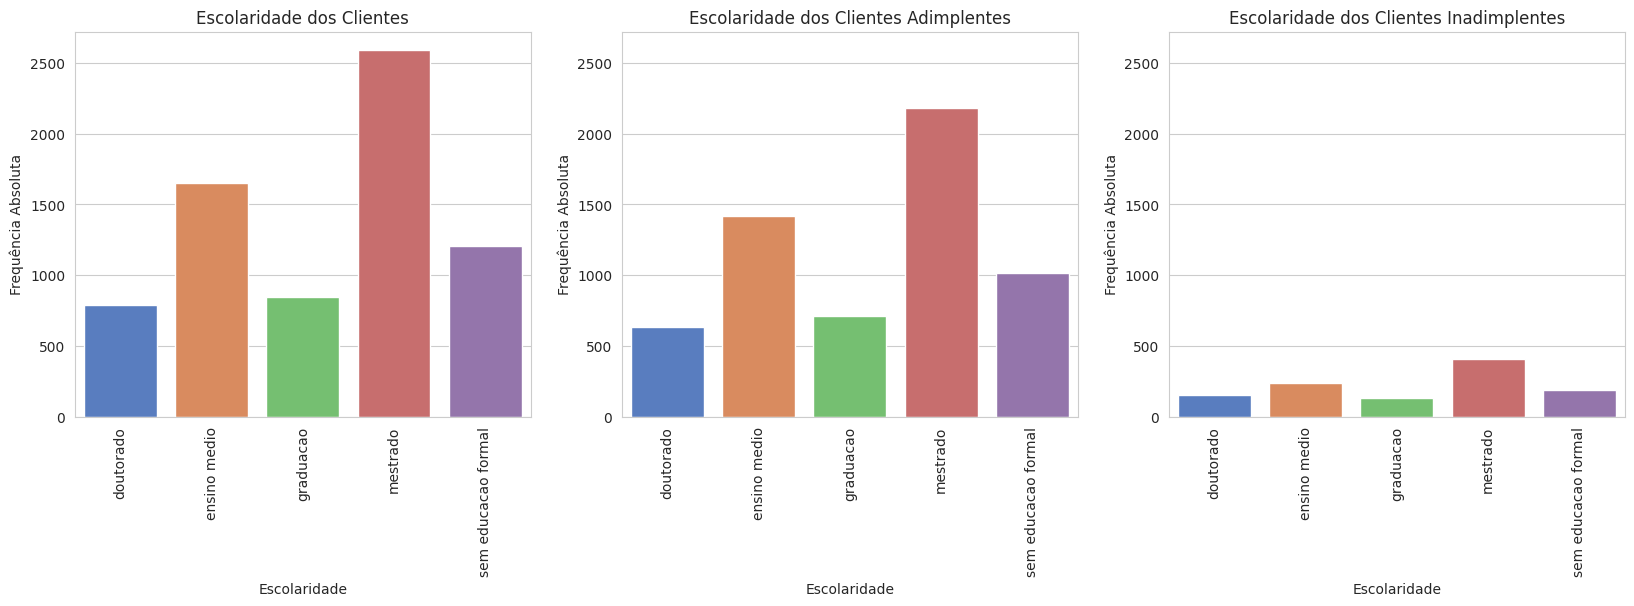

In [39]:
#Análise categórica de acordo com a escolaridade de cada cliente:
coluna = "escolaridade"
titulos = [
    "Escolaridade dos Clientes",
    "Escolaridade dos Clientes Adimplentes",
    "Escolaridade dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], palette="muted")
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

É possível perceber que os níveis de escolaridade nos mostram que não existe uma variação considerável entre os clientes adimplentes e os inadimplentes. 

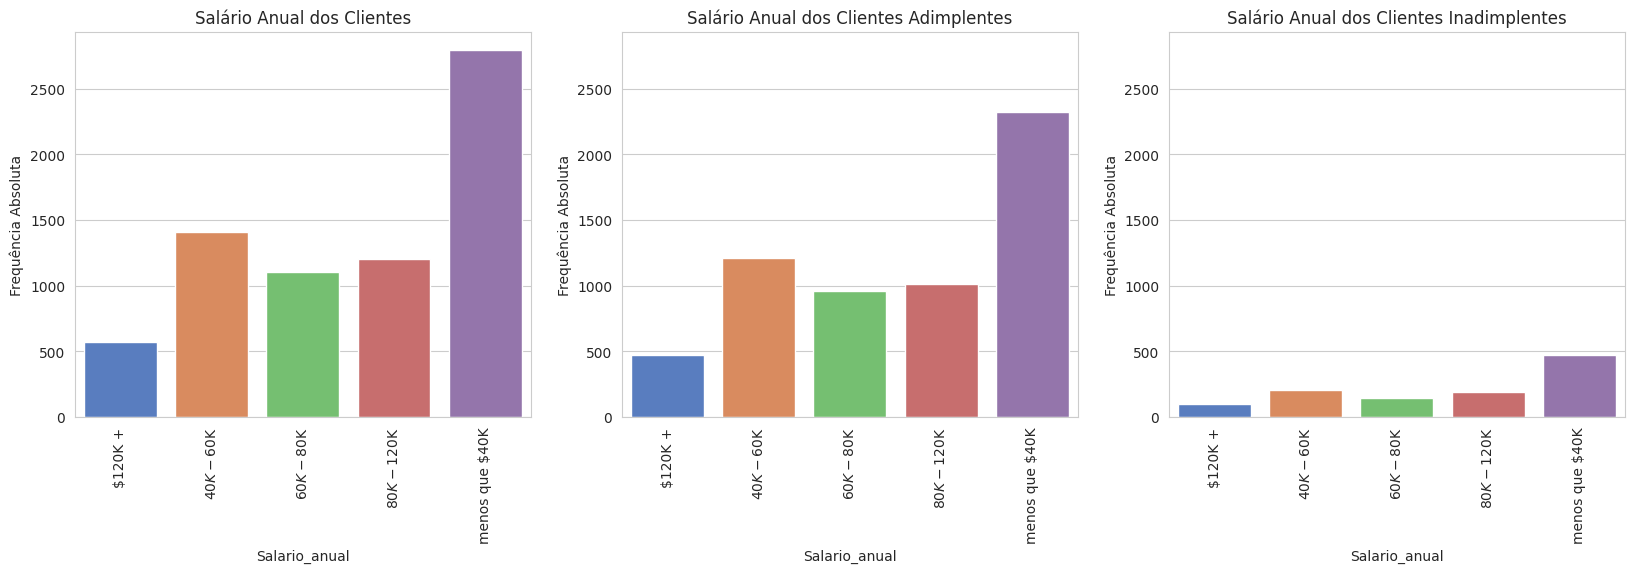

In [40]:
#Análise categórica de acordo com o salário anual de cada cliente:
coluna = "salario_anual"
titulos = [
    "Salário Anual dos Clientes",
    "Salário Anual dos Clientes Adimplentes",
    "Salário Anual dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], palette="muted")
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

Novamente, percebemos que não existe alteração considerável entre os clientes adimplentes e os inadimplentes, seja eles agrupados ou separados na categoria de salário anual. 

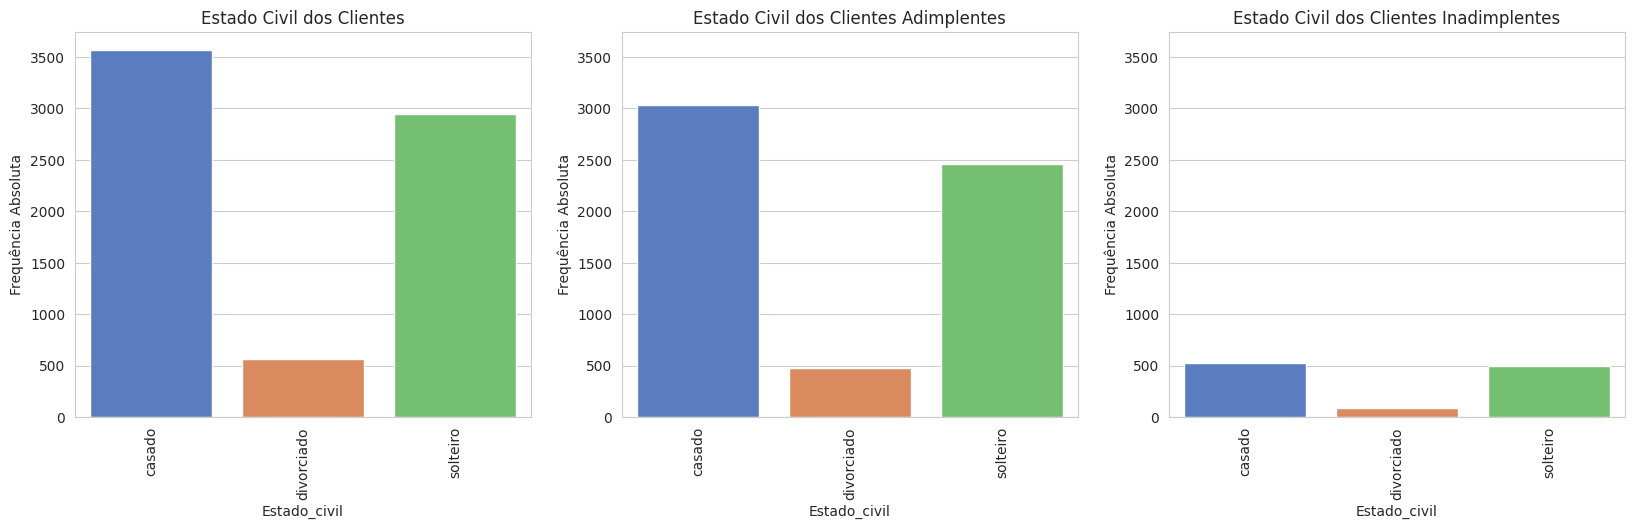

In [41]:
coluna = "estado_civil"
titulos = [
    "Estado Civil dos Clientes",
    "Estado Civil dos Clientes Adimplentes",
    "Estado Civil dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], palette="muted")
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

Já aqui percebemos que a proporção entre clientes adimplentes e inadimplentes tem uma variação: a proporção dos clientes casados é maior que a dos solteiros quando analisamos o grupo dos adimplentes, já no grupo dos inadimplentes existe uma equivalência entre os casados e solteiros. Sendo assim, a proporção de clientes solteiros inadimplentes é um pouco maior.

# 6.2 Visualização dos dados numéricos

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

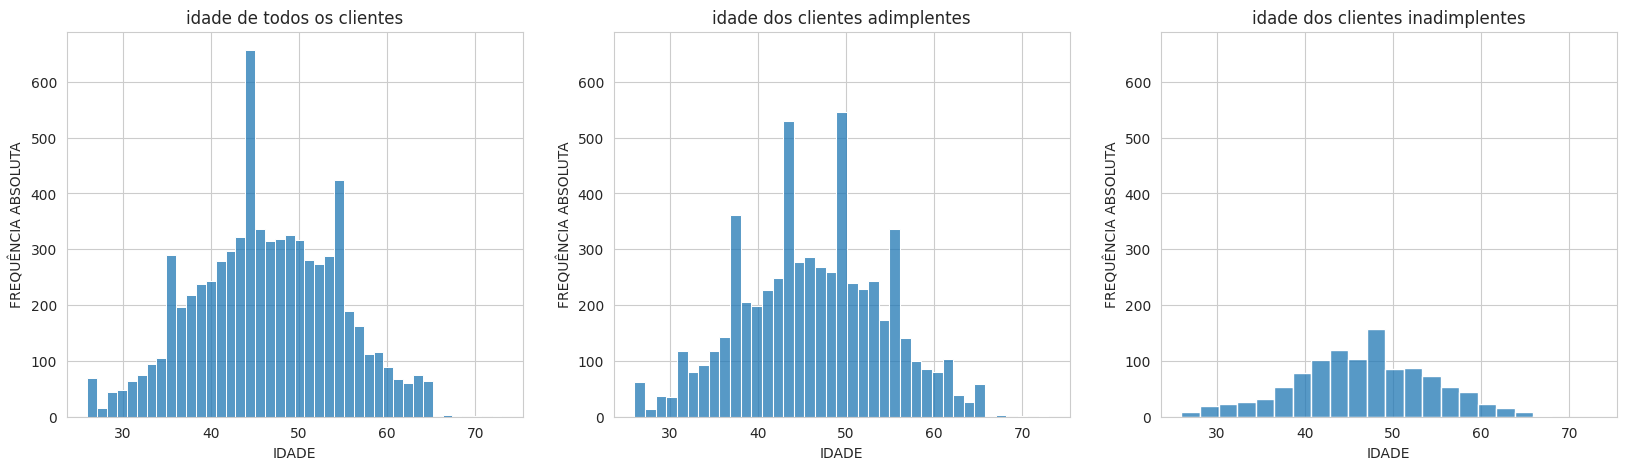

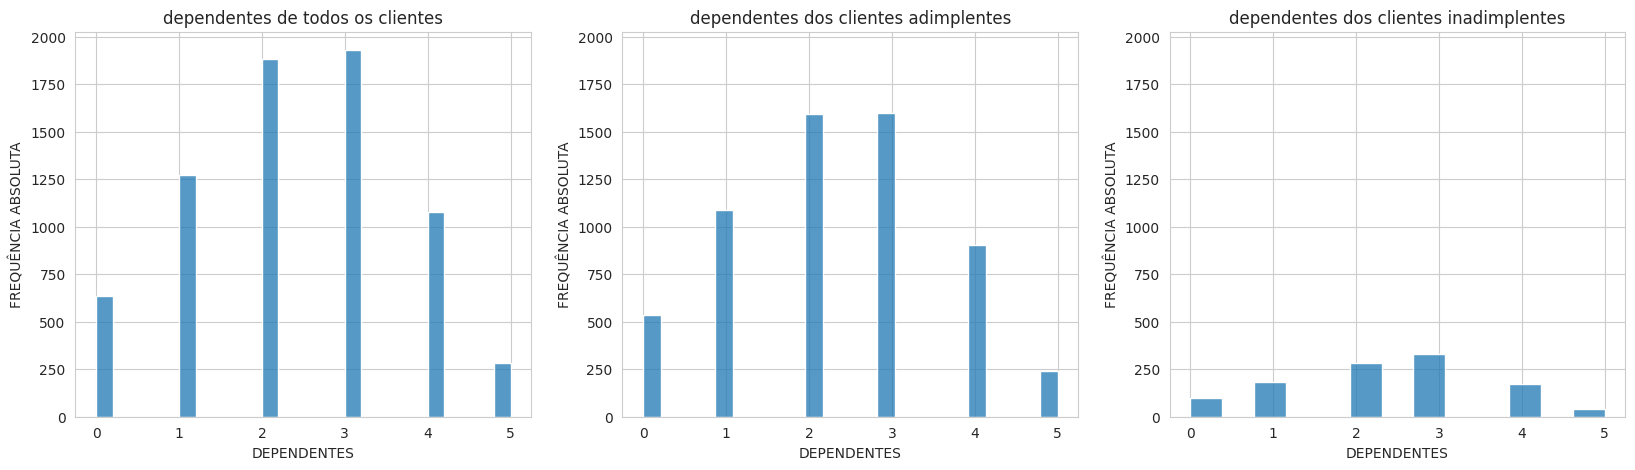

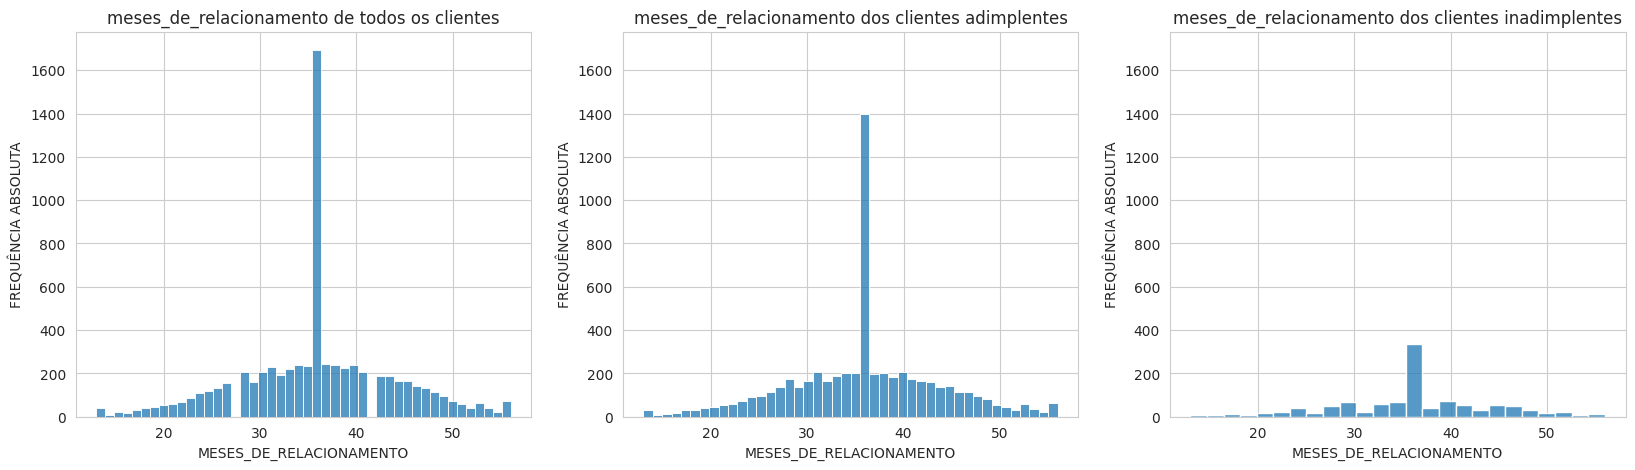

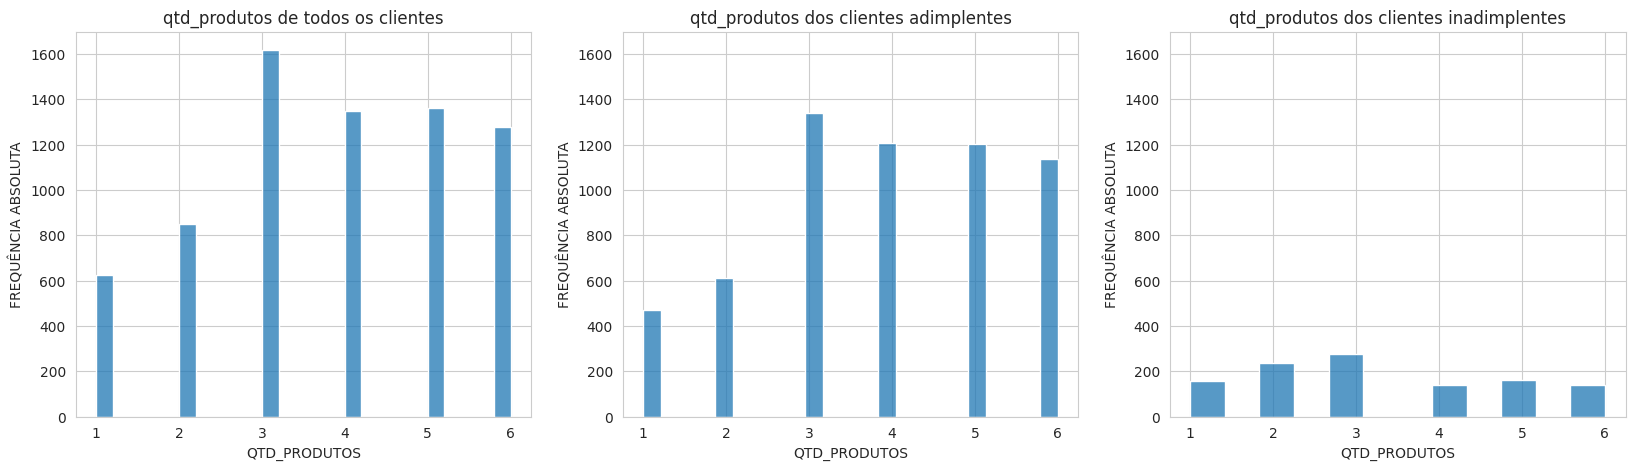

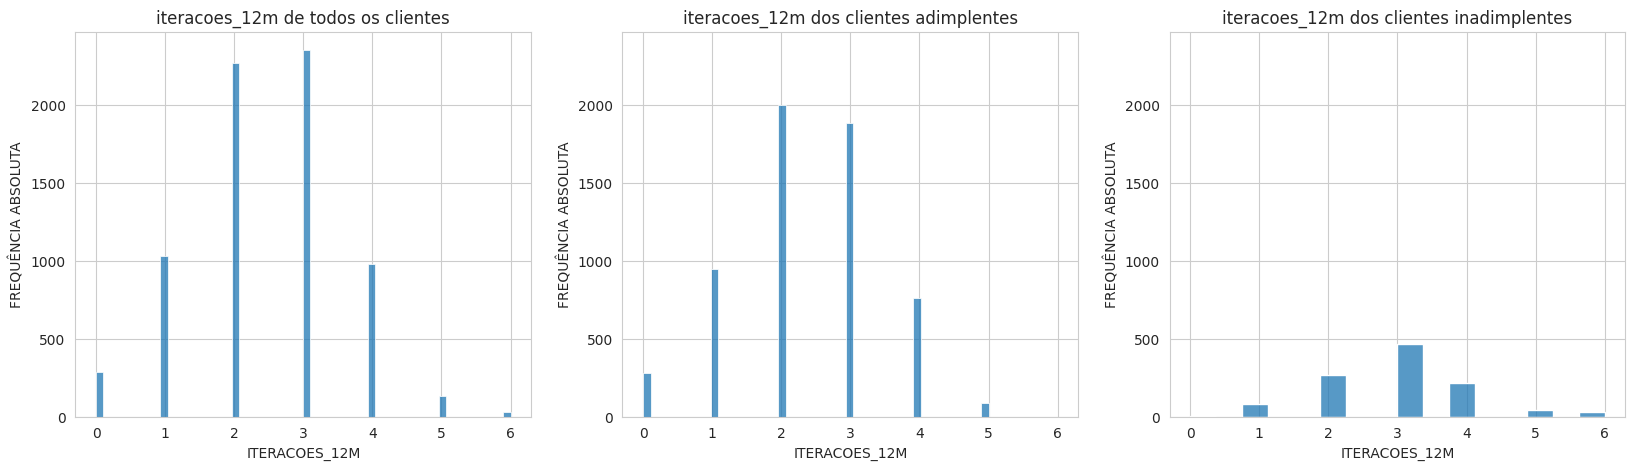

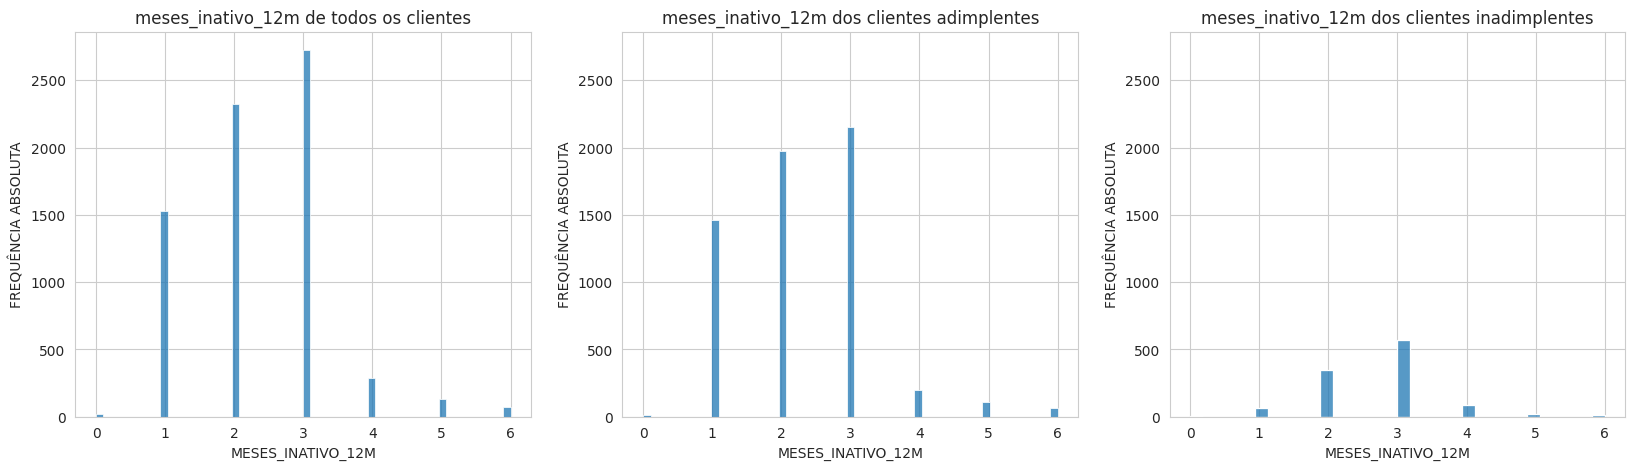

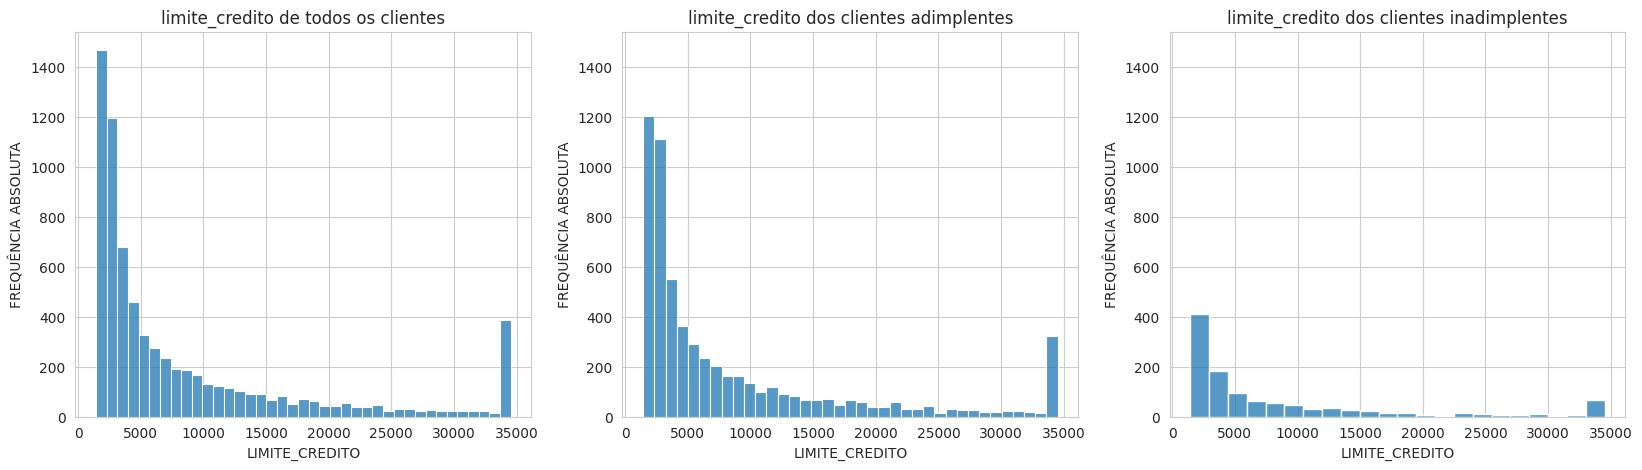

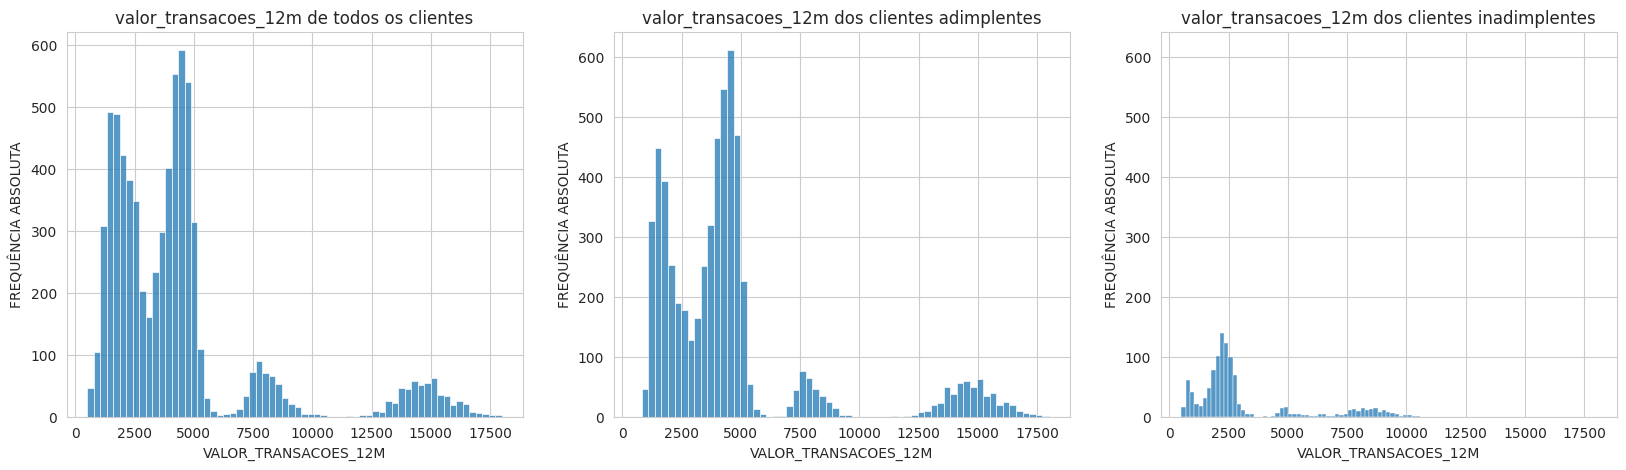

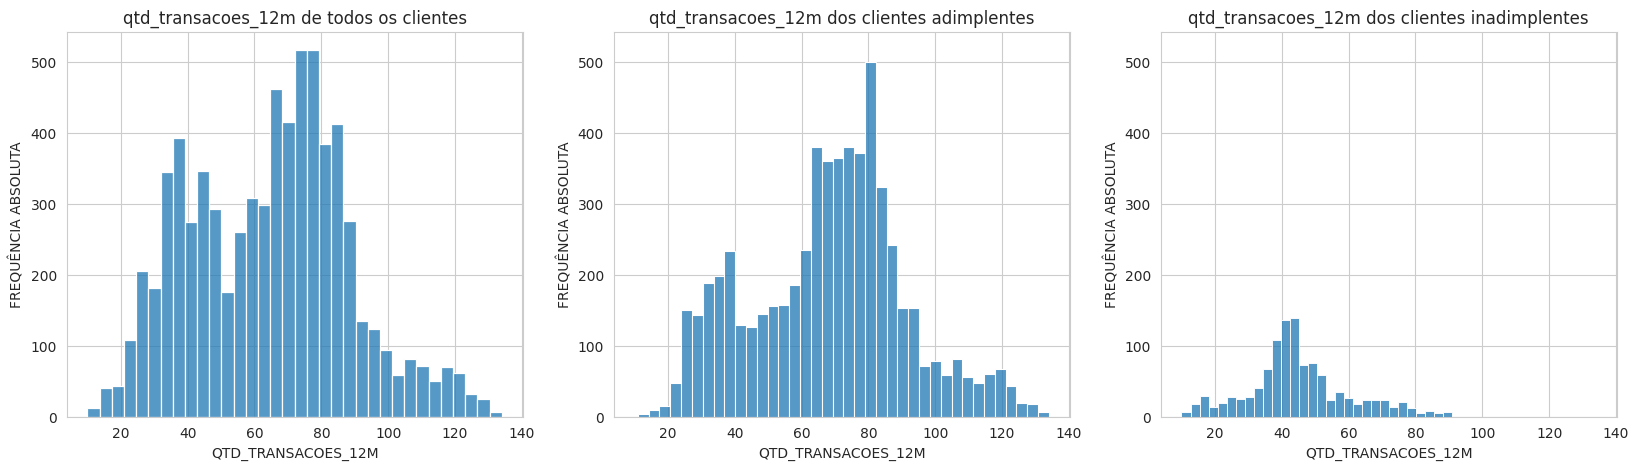

In [42]:
# Apresentação dos dados numéricos onde iremos ver 3 conjuntos de gráficos para cada coluna, sendo uma coluna com todos os clientes, uma com clientes adimplentes e a última com os clientes inadimplentes.

for coluna in df.drop(labels=['id', 'default'], axis=1).select_dtypes('number'):

  titulos = [
      f'{coluna} de todos os clientes',
      f'{coluna} dos clientes adimplentes',
      f'{coluna} dos clientes inadimplentes'
      ]

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(
      nrows=1,
      ncols=3,
      figsize=(20, 5),
      sharex=True
      )

  for dataframe in [df, df_adimplentes, df_inadimplentes]:

    f = sns.histplot(
        x=coluna,
        data=dataframe,
        stat='count',
        ax=eixos[eixo]
        )
    f.set(
        title=titulos[eixo],
        xlabel=coluna.upper(),
        ylabel='FREQUÊNCIA ABSOLUTA'
        )

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

Agora, analisando os gráficos gerados acima podemos extrair algumas informações:
- Idade: não apresenta informações relevantes para o resultado.
- Dependentes: não apresenta informações relevantes para o resultado.
- Mese de relacionamento: não apresenta informações relevantes para o resultado.
- Quantidade de produtos: A taxa de inadimplentes é maior nos clientes com até 3 produtos.
- Iterações nos últimos 12 meses: clientes inadimplentes possuem até 6 iterações enquanto os adimplentes possuem geralmente até 5 iterações.
- Meses inativos nol últimos 12 meses: não apresenta informações relevantes para o resultado.
- Limite de crédito: não apresenta informações relevantes para o resultado.
- Valor das transações nos últimos 12 meses: clientes inadimplentes efetuaram transações com valores de até 11.000 enquanto que os clientes adimplentes os valores chegaram até 18.000. Também pode-se perceber um isolamento dos clientes adimplentes na zona entre o valor de 12.500 e 18.000.
- Quantidade de transações nos últimos 12 meses: os clientes adimplentes efetuaram até 134 transações (com uma média de 68 transações). Já os clientes inadimplentes efetuaram no máximo 91 transações (média de 44 transações) com valores menores.

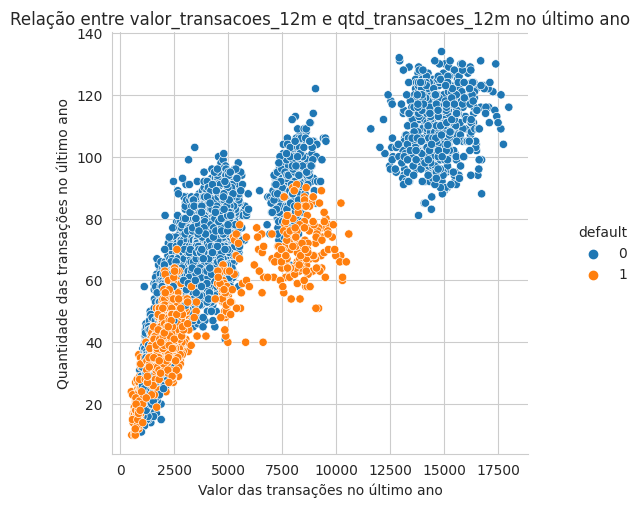

In [43]:
 # Represetação gráfica dp valor das transações nos últimos 12 meses X quantidade de transações nos últimos 12 meses:

f = sns.relplot(
    x='valor_transacoes_12m',
    y='qtd_transacoes_12m',
    data=df,
    hue='default'
    )
_ = f.set(
    title='Relação entre valor_transacoes_12m e qtd_transacoes_12m no último ano',
    xlabel='Valor das transações no último ano',
    ylabel='Quantidade das transações no último ano'
  )

Relembrando que os clientes representados em azul (default == 0) são nossos clientes adimpletes, podemos perceber no gráfico acima que eles se isolam no topo do gráfico com quantidades e valores de transações igualmente mais altos que os clientes inadimplentes, aqui representados pela cor laranja (default == 1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

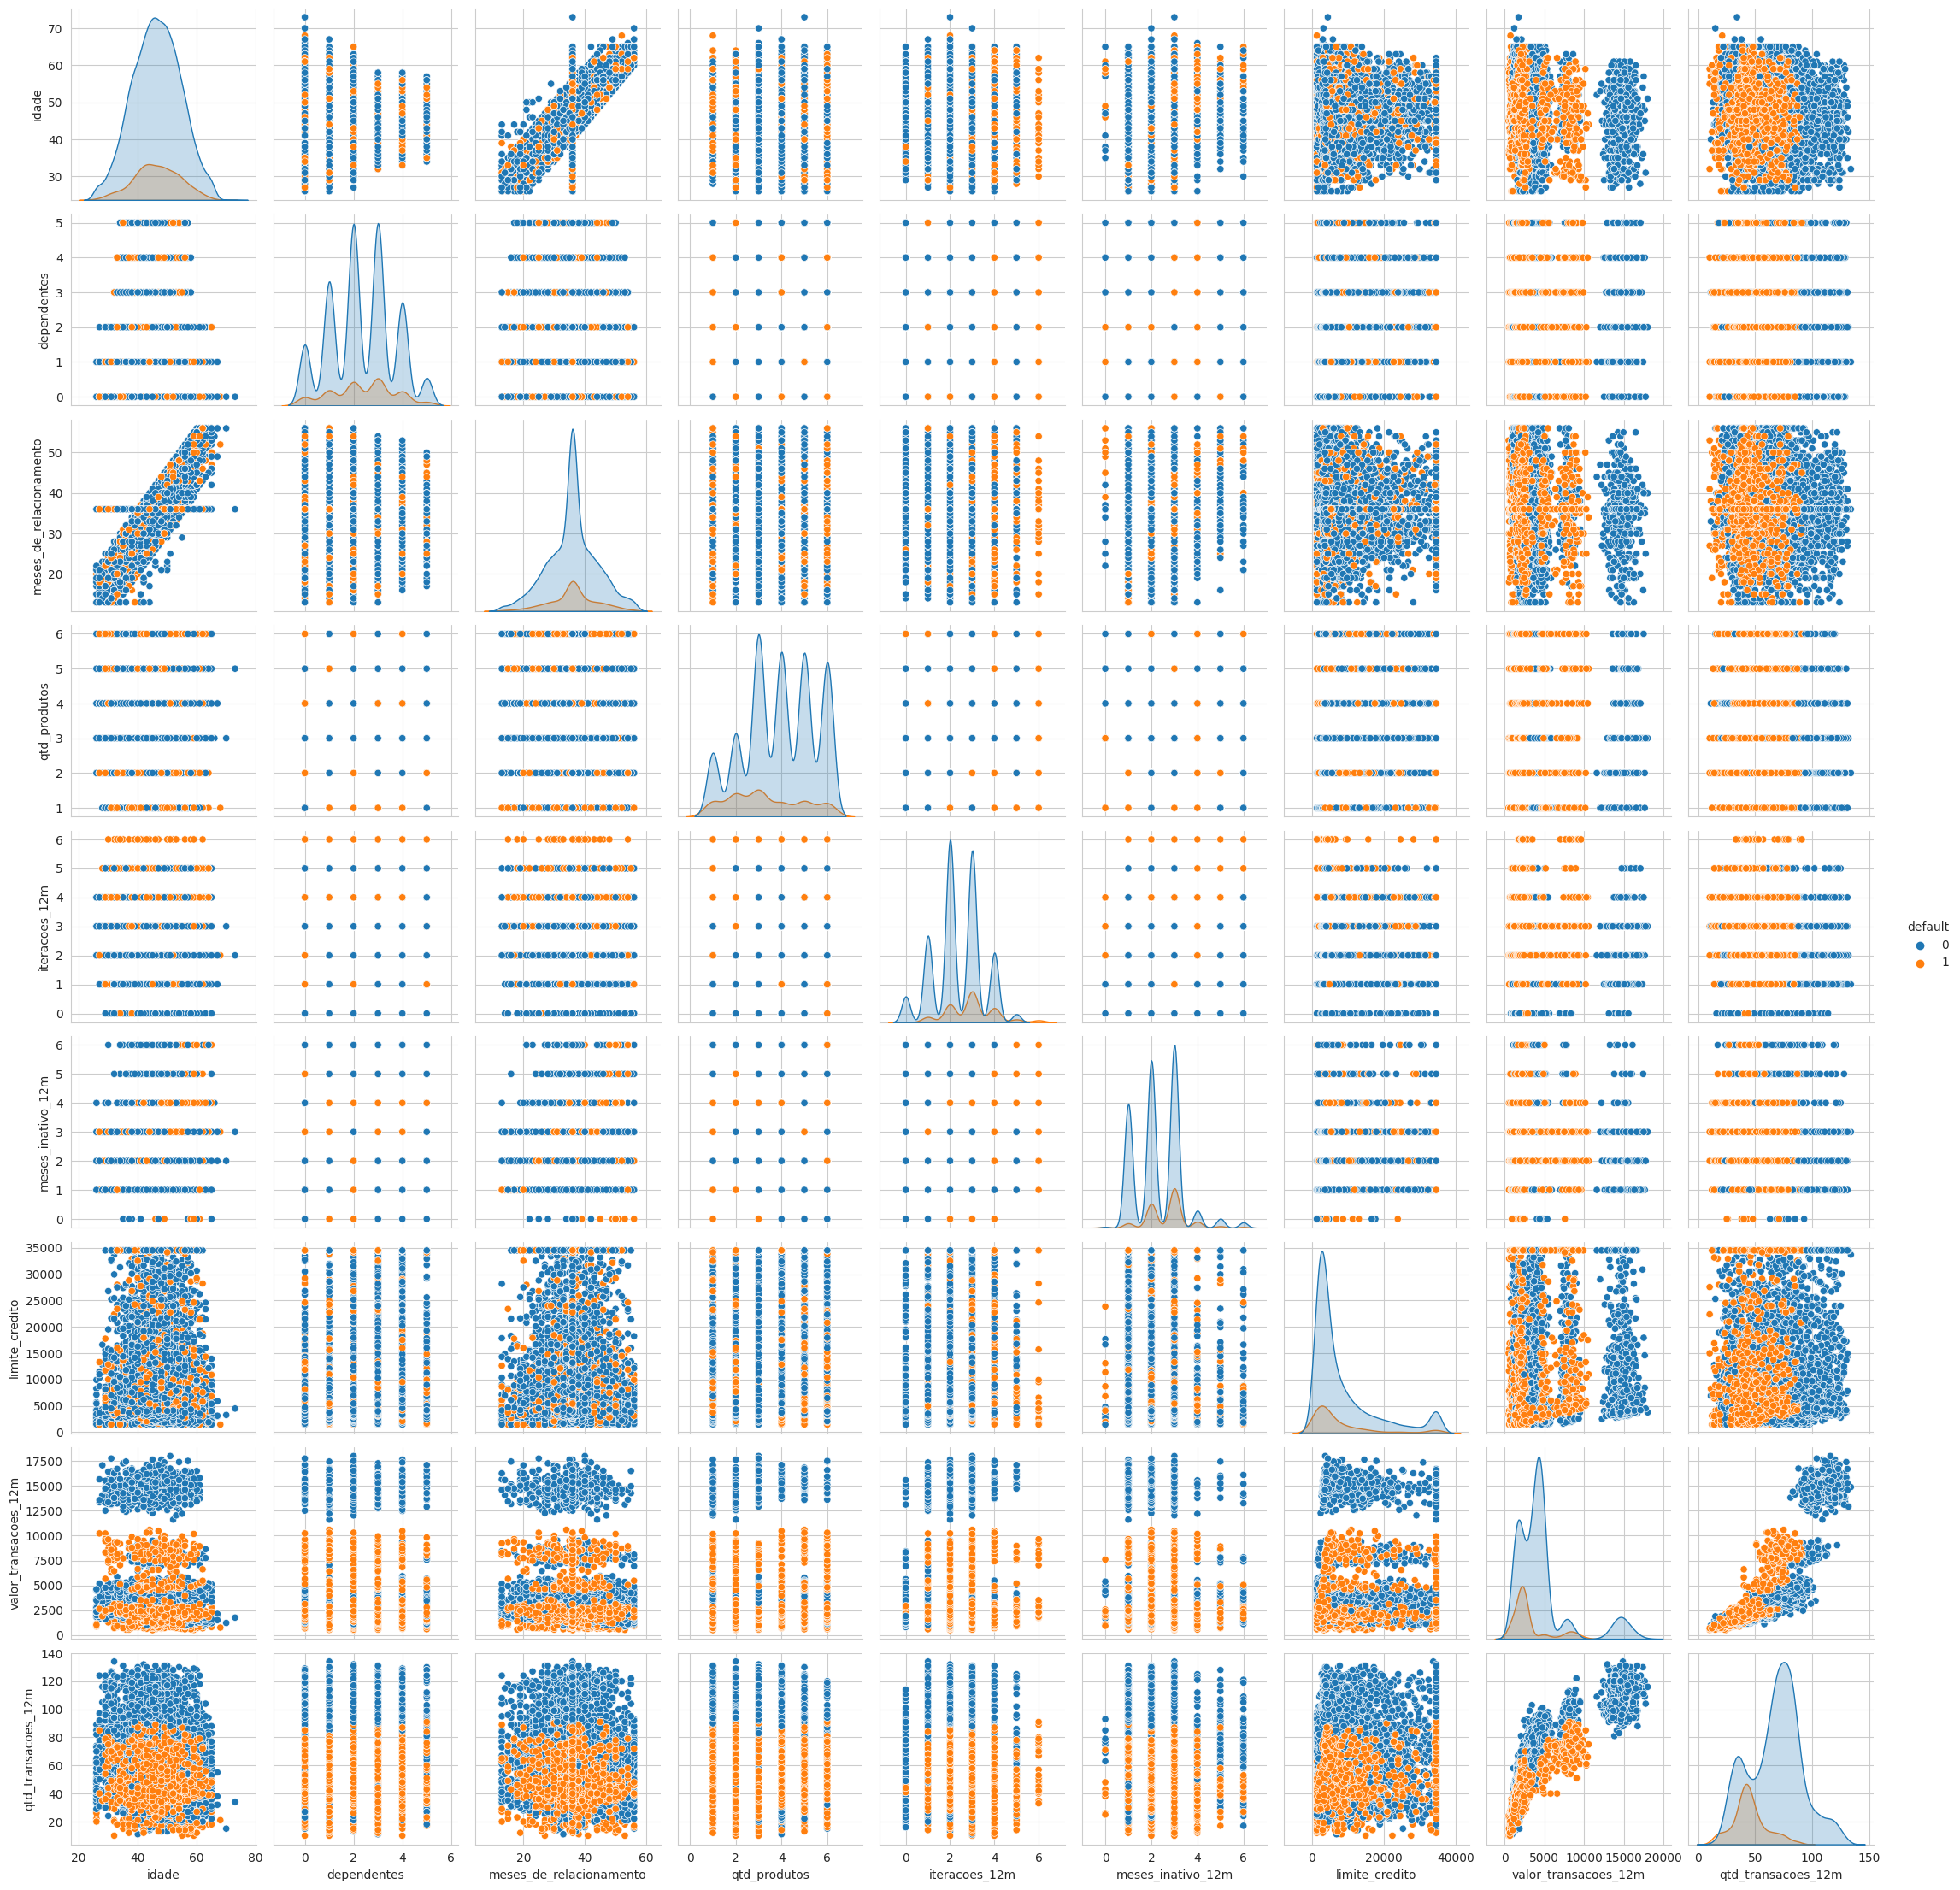

In [44]:
#Nessa apresentação vamos cruzar eixos distintos para tentar identificar padrões entre so clientes adimpletes 'default == 0'(cor azul) e clientes inadimplentes 'default ==1'(cor laranja).
sns.pairplot(data=df.drop(labels='id', axis=1), hue="default")

Os clientes adimplentes, representados pela cor azul, se concentram de forma isolada em pontos específicos onde analisamos a quantidade de transações (quando ela é maior) bem como o valor das transações (também quando é maior). Conseguimos identificar zonas mais seguras comparando essas duas colunas. Os clientes inadimplentes se agrupam em zonas de transações com valores mais baixos (se concentrando na faixa de valor em torno de 2.500) e quantidades mais baixas de transações ( em torno de 44 transações). A quantidade de 6 iterações durante o ano também isolam uma faixa de clientes inadimplentes.

#  7. Resumo dos *insights* gerados

Exploramos as variáveis explicativas tanto de forma independente como correlacionadas umas com as outras, tendo como principal referência de comparação a variável resposta da coluna default que se trata do atributo de interesse e descreve a adimplência ou inadimplência dos clientes.

Abaixo temos algumas considerações resultantes das análises dos tipos categóricos e numéricos. Lembrando que os dados da coluna 'sexo' são protegidos pela LGPD e não foram usados como parâmetros.

# 7.1 Resultados dos atributos categóricos

Na coluna escolaridade e salário anual percebemos proporções semelhantes entre os clientes adimplentes e os inadimplentes. Sendo assim eles não interferem no comportamento dos clientes, bem como os tipos de cartões utilizados, os quais apresentam dados irrelevantes para o resultado.  

Já na coluna de estado civil, percebemos que a proporção de clientes solteiros inadimplentes é maior se comparada à proporção de clientes solteiros adimplentes. Percebe-se uma diferença no comportamento de clientes solteiros comparando as duas proporções. 

# 7.2 Resultados dos atributos numéricos

Entre os produtos que os clientes podem contratar, quem possui até três produtos apresenta a taxa de inadimplência maior do que quem possui mais produtos contratados. Clientes inadimplentes chegaram a ter seis iterações com o banco enquanto os clientes adimplentes costumam ter até cinco iterações. Também é possível observar que os clientes inadimplentes efetuaram transações com valores de até 11.000 e já os clientes adimplentes os valores vão até 18.000.
Os clientes adimplentes efetuaram até 134 transações (com uma média de 68 transações). Já os clientes inadimplentes efetuaram no máximo 91 transações (média de 44 transações) com valores menores concentrados na faixa de 2.500. A taxa de inadimplência também se torna elevada entre os clientes que efetuaram uma média de 40 transações no último ano.

# 7.3 Considerações Finais

Dentre todos os parâmetros analisados percebemos que os clientes com maior valor e quantidade de transações tendem a ser clientes adimplentes. Os parâmetros categóricos não apresentaram grandes alterações, mesmo sendo analisados os salários anuais dos clientes. Apenas observa-se uma alteração quando observamos o estado civil, sendo que a proporção de clientes solteiros inadimplentes é maior quando comparada aos clientes casados.